In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import polytope as pc
from zonotope import Zonotope

`polytope` failed to import `cvxopt.glpk`.
will use `scipy.optimize.linprog`


In [2]:
center = np.array([2,1])
generators = np.array([[1,1], [-1,1]])
cov = np.eye(2)

In [3]:
Z = Zonotope(center, generators, cov)
Z = Z + Zonotope(center, np.array([1,0]), np.eye(2))

In [4]:
A, b = Z.to_H()
p = pc.Polytope(A, b)

<IPython.core.display.Javascript object>


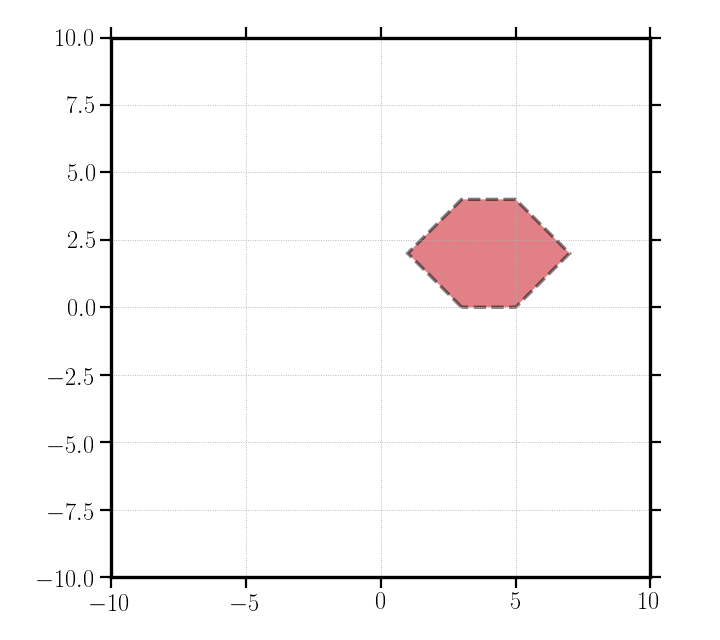

(-10.0, 10.0)

In [5]:
fig, ax = plt.subplots()
p.plot(ax=ax, alpha=0.5)
ax.set_aspect('equal')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

In [6]:
Z = Z + Zonotope(np.zeros((2,)), np.array([1,0.5]), np.eye(2))
Z = Z + Zonotope(np.zeros((2,)), np.array([1,2]), np.eye(2))
print(Z.G)
A, b = Z.to_H()
p1 = pc.Polytope(A, b)

[[ 1.   1.   1.   1.   1. ]
 [-1.   1.   0.   0.5  2. ]]


In [7]:
Z.reduce()
print(Z.G)
A, b = Z.to_H()
p2 = pc.Polytope(A, b)

(2, 4)
[[1.  4.  0. ]
 [2.  0.  2.5]]


<IPython.core.display.Javascript object>


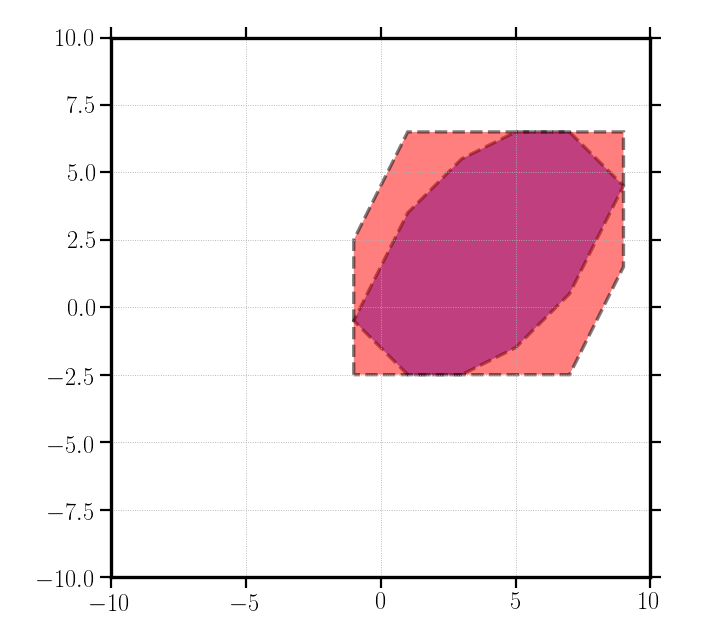

(-10.0, 10.0)

In [8]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
p1.plot(ax=ax, alpha=0.5, color='blue')
p2.plot(ax=ax, alpha=0.5, color='red')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)